In [1]:
import torch

from rl4co.envs import CVRPEnv, TSPEnv
from rl4co.models.zoo.ppo.model import PPOModel
from rl4co.utils.trainer import RL4COTrainer

In [2]:
env = CVRPEnv(num_loc=20)

model = PPOModel(
    env,
    train_data_size=100,
    val_data_size=10,
    mini_batch_size=1.0,
    optimizer_kwargs={"lr": 0.0001},
)

Tour lengths: ['17.11', '7.36', '9.83']


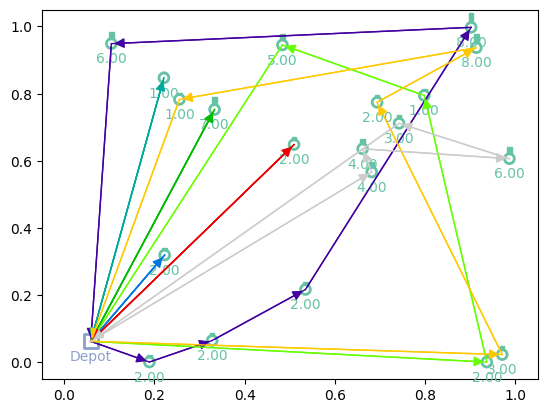

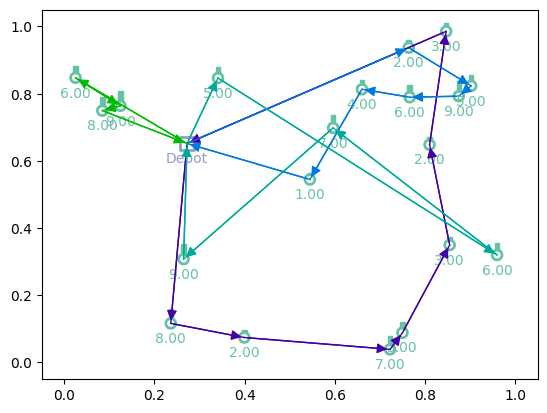

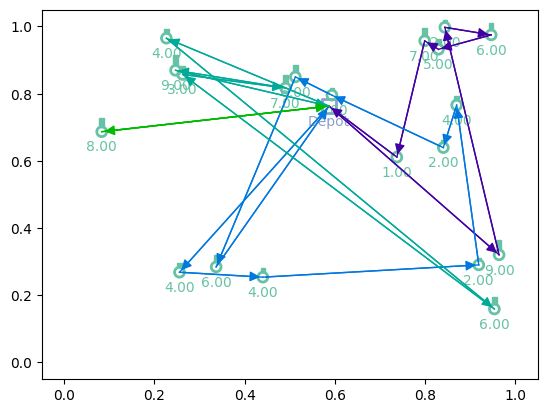

In [3]:
# Greedy rollouts over untrained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
td_init = env.reset(batch_size=[3]).to(device)
model = model.to(device)
out = model(td_init, phase="test", decode_type="greedy", return_actions=True)

# Plotting
print(f"Tour lengths: {[f'{-r.item():.2f}' for r in out['reward']]}")
for td, actions in zip(td_init, out["actions"].cpu()):
    env.render(td, actions)

In [6]:
trainer = RL4COTrainer(max_epochs=3, accelerator="cpu", precision="32", logger=None)

trainer.fit(model)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/silab9/anaconda3/envs/torch200-py39/lib/python3.9/site-packages/lightning/pytorch/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=2)`.
  rank_zero_warn(
val_file not set. Generating dataset instead
test_file not set. Generating dataset instead
/home/silab9/anaconda3/envs/torch200-py39/lib/python3.9/site-packages/lightning/pytorch/core/optimizer.py:309: RuntimeWarning: The lr scheduler dict contains the key(s) ['monitor'], but the keys will be ignored. You need to call `lr_scheduler.step()` manually in manual optimization.
  rank_zero_warn(

  | Name   | Type          | Params
-----------------------------------------
0 | env    | CVRPEnv       | 0     
1 | policy | PPOPolicy     | 694 K 
2 | critic | CriticNetwork | 662 K 
-----------

Sanity Checking: 0it [00:00, ?it/s]

/home/silab9/anaconda3/envs/torch200-py39/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/silab9/anaconda3/envs/torch200-py39/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/silab9/anaconda3/envs/torch200-py39/lib/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


Tour lengths: ['27.77', '9.15', '9.50']


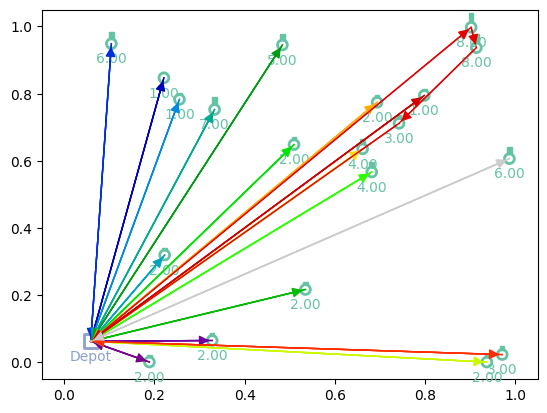

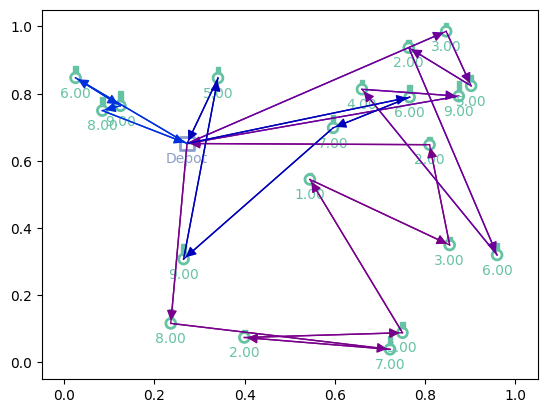

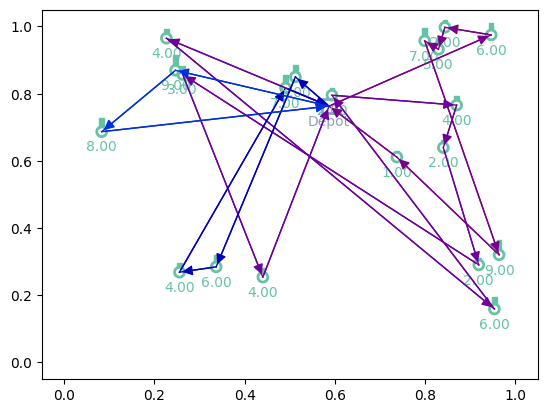

In [7]:
# Greedy rollouts over trained model (same states as previous plot)
model = model.to(device)
out = model(td_init, phase="test", decode_type="greedy", return_actions=True)

# Plotting
print(f"Tour lengths: {[f'{-r.item():.2f}' for r in out['reward']]}")
for td, actions in zip(td_init, out['actions'].cpu()):
    env.render(td, actions)